In [46]:
import nltk
import pandas as pd
import chardet
from matplotlib import pyplot as plt
import re
import seaborn as sns
import numpy as np
from statsmodels import api as sm
from wordcloud import WordCloud
from collections import Counter
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import sklearn
import networkx as nx
import itertools
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Text Laguage
language = 'english'

# Figure default size
plt.rcParams['figure.figsize'] = (10, 5)

In [3]:
sns.set_theme(color_codes = True)

In [4]:
files = [
    'Harry Potter 1 - The Sorcerer.txt',
    'Harry Potter 2 - Chamber of Secrets.txt',
    'Harry Potter 3 - The Prisoner Of Azkaban.txt',
    'Harry Potter 4 - The Goblet Of Fire.txt',
    'Harry Potter 5 - Order of the Phoenix.txt',
    'Harry Potter 6 - The Half Blood Prince.txt',
    'Harry Potter 7 - Deathly Hollows.txt'
]

In [5]:
e = {}

for i in files:

    with open(i, 'rb') as f:

        e[i] = chardet.detect(f.read())

        print(i, e[i])

Harry Potter 1 - The Sorcerer.txt {'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}
Harry Potter 2 - Chamber of Secrets.txt {'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
Harry Potter 3 - The Prisoner Of Azkaban.txt {'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}
Harry Potter 4 - The Goblet Of Fire.txt {'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
Harry Potter 5 - Order of the Phoenix.txt {'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
Harry Potter 6 - The Half Blood Prince.txt {'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}
Harry Potter 7 - Deathly Hollows.txt {'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [6]:
books = []

for i in files:
    with open(i, 'r', encoding = e[i]['encoding']) as f:
        print(i)
        books.append(f.read())
        

Harry Potter 1 - The Sorcerer.txt
Harry Potter 2 - Chamber of Secrets.txt
Harry Potter 3 - The Prisoner Of Azkaban.txt
Harry Potter 4 - The Goblet Of Fire.txt
Harry Potter 5 - Order of the Phoenix.txt
Harry Potter 6 - The Half Blood Prince.txt
Harry Potter 7 - Deathly Hollows.txt


In [7]:
books_pd = pd.DataFrame(books, index = [s[:-4] for s in files])

books_pd.columns = ['raw text']

books_pd

,raw text
Harry Potter 1 - The Sorcerer,Harry Potter and the Sorcerer's Stone \n\nCHAP...
Harry Potter 2 - Chamber of Secrets,\n1\nHARRY POTTER\nAND THE CHAMBER OF SECRETS\...
Harry Potter 3 - The Prisoner Of Azkaban,\n\n CHAPTER ONE OWL POST\n\nHarry Potter was ...
Harry Potter 4 - The Goblet Of Fire,Harry Potter and the Goblet of Fire by J.K. Ro...
Harry Potter 5 - Order of the Phoenix,Harry Potter and the Order of the Phoenix\nBy ...
Harry Potter 6 - The Half Blood Prince,\nTable of Contents:\n1. The Other Minister\n2...
Harry Potter 7 - Deathly Hollows,Harry Potter and the Deathly Hallows By J. K. ...


In [66]:
books_pd['raw text'] = books_pd['raw text'].apply(lambda text: re.sub('said', '', text))

In [67]:
# Remove puctuation
remove_puctuation = lambda a: [i for i in a if i.isalnum()]

# Create tokens
books_pd['token'] = books_pd['raw text'].apply(   
    lambda s: remove_puctuation( nltk.tokenize.word_tokenize (s.lower()) )    
) 

# Remove Stop Words
stop_words = set(nltk.corpus.stopwords.words(language))

books_pd['no stop words'] = books_pd['token'].apply(
    lambda s: [w for w in s if w not in stop_words]
)

# Stemming
ps = nltk.stem.PorterStemmer()

books_pd['stemming'] = books_pd['no stop words'].apply(
    lambda s: [ps.stem(w) for w in s]
)

# Lemmatization
lem = nltk.stem.wordnet.WordNetLemmatizer()

books_pd['lemmatization'] = books_pd['no stop words'].apply(
    lambda s: [lem.lemmatize(w,"v") for w in s]
)

In [68]:
books_pd

,raw text,token,no stop words,stemming,lemmatization
Harry Potter 1 - The Sorcerer,Harry Potter and the Sorcerer's Stone \n\nCHAP...,"[harry, potter, and, the, sorcerer, stone, cha...","[harry, potter, sorcerer, stone, chapter, one,...","[harri, potter, sorcer, stone, chapter, one, b...","[harry, potter, sorcerer, stone, chapter, one,..."
Harry Potter 2 - Chamber of Secrets,\n1\nHARRY POTTER\nAND THE CHAMBER OF SECRETS\...,"[1, harry, potter, and, the, chamber, of, secr...","[1, harry, potter, chamber, secrets, rowling, ...","[1, harri, potter, chamber, secret, rowl, book...","[1, harry, potter, chamber, secrets, rowling, ..."
Harry Potter 3 - The Prisoner Of Azkaban,\n\n CHAPTER ONE OWL POST\n\nHarry Potter was ...,"[chapter, one, owl, post, harry, potter, was, ...","[chapter, one, owl, post, harry, potter, highl...","[chapter, one, owl, post, harri, potter, highl...","[chapter, one, owl, post, harry, potter, highl..."
Harry Potter 4 - The Goblet Of Fire,Harry Potter and the Goblet of Fire by J.K. Ro...,"[harry, potter, and, the, goblet, of, fire, by...","[harry, potter, goblet, fire, rowling, harry, ...","[harri, potter, goblet, fire, rowl, harri, pot...","[harry, potter, goblet, fire, rowling, harry, ..."
Harry Potter 5 - Order of the Phoenix,Harry Potter and the Order of the Phoenix\nBy ...,"[harry, potter, and, the, order, of, the, phoe...","[harry, potter, order, phoenix, rowling, chapt...","[harri, potter, order, phoenix, rowl, chapter,...","[harry, potter, order, phoenix, rowling, chapt..."
Harry Potter 6 - The Half Blood Prince,\nTable of Contents:\n1. The Other Minister\n2...,"[table, of, contents, the, other, minister, sp...","[table, contents, minister, spinner, end, hora...","[tabl, content, minist, spinner, end, horac, s...","[table, content, minister, spinner, end, horac..."
Harry Potter 7 - Deathly Hollows,Harry Potter and the Deathly Hallows By J. K. ...,"[harry, potter, and, the, deathly, hallows, by...","[harry, potter, deathly, hallows, rowling, cha...","[harri, potter, deathli, hallow, rowl, chapter...","[harry, potter, deathly, hallow, rowling, chap..."


### Unique words by book

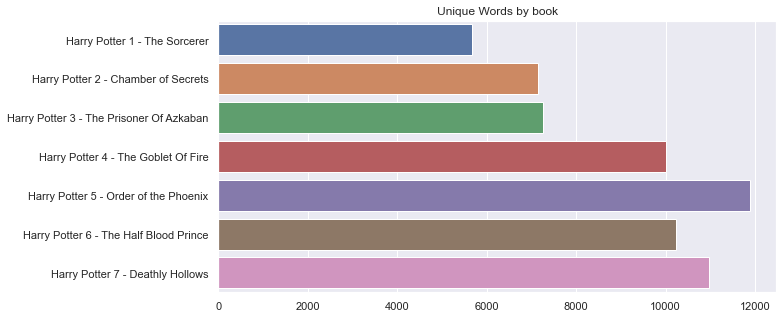

In [70]:
wc = {}

for n, i in enumerate(books_pd['token']):
    
    name = books_pd.index[n]
    wc[name] = len(np.unique(i))

sns.barplot(
    y = list(wc.keys()), 
    x = list(wc.values()),
    orient = 'h'
)

plt.title('Unique Words by book')

plt.show()

### Word Cloud

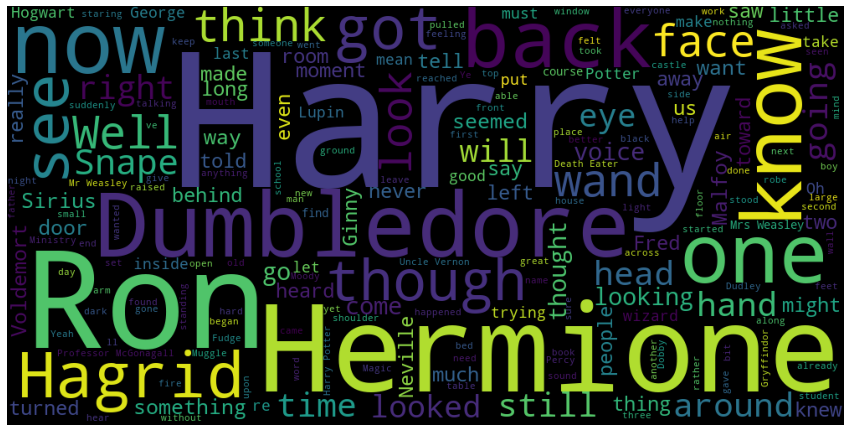

In [71]:
text = ' '.join(books_pd['raw text'].to_list())

text = re.sub('said', '', text)

wc = WordCloud(width = 1000, height = 500).generate_from_text(text)

plt.figure(figsize=(15,8))

plt.imshow(wc)
plt.axis("off")
plt.show()

### Zipf's Law

In [72]:
def zipf_law(w):
    
    freq = [i[1] for i in w]
    
    r = np.arange(1, len(freq) + 1)
    
    # Plot Results
    sns.regplot(
        # Frequency
        y = np.log(freq),
        # Rank
        x = np.log(r), 
    )

    plt.ylabel('Log(Frequency)')

    plt.xlabel('Log(r)')

    plt.show()
    
    # Linear Regression
    lm = sm.OLS(
        # Frequency
        np.log(freq),
        # Rank
        np.log(r)
    )

    result = lm.fit()

    print(result.summary())

### Zipf's Law and Word Count

token
Number of words:  21606


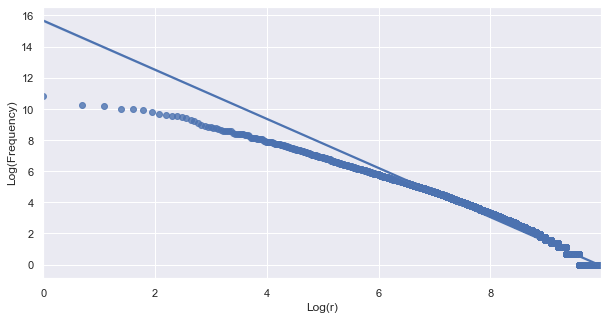

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.361
Model:                            OLS   Adj. R-squared (uncentered):              0.361
Method:                 Least Squares   F-statistic:                          1.220e+04
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                        0.00
Time:                        22:00:32   Log-Likelihood:                         -42793.
No. Observations:               21606   AIC:                                  8.559e+04
Df Residuals:                   21605   BIC:                                  8.560e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

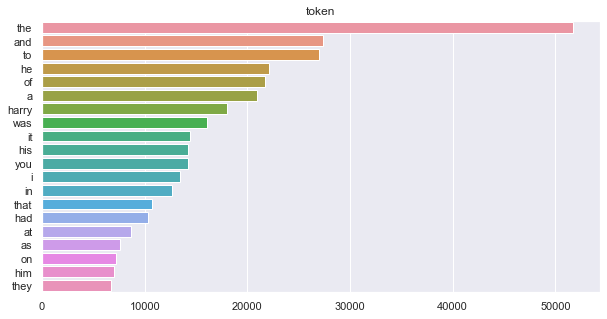

----------------------------------------------------------------------------------------------------
no stop words
Number of words:  21455


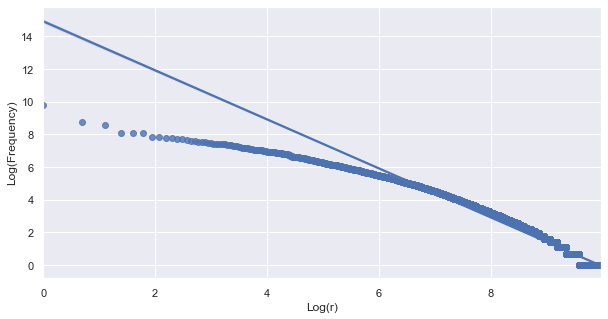

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.370
Model:                            OLS   Adj. R-squared (uncentered):              0.370
Method:                 Least Squares   F-statistic:                          1.260e+04
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                        0.00
Time:                        22:00:33   Log-Likelihood:                         -41589.
No. Observations:               21455   AIC:                                  8.318e+04
Df Residuals:                   21454   BIC:                                  8.319e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

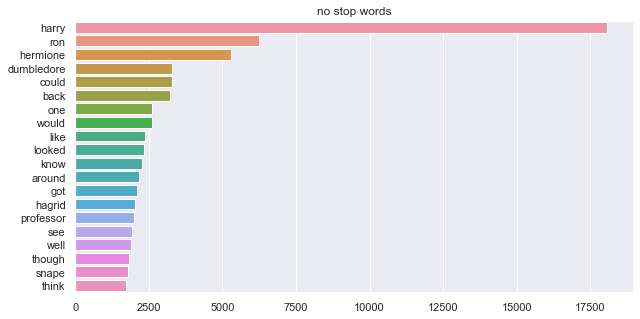

----------------------------------------------------------------------------------------------------
stemming
Number of words:  13440


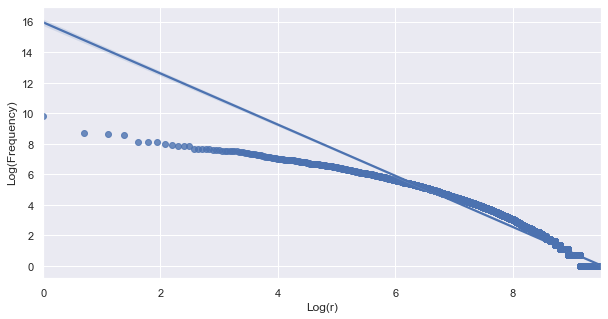

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.383
Model:                            OLS   Adj. R-squared (uncentered):              0.383
Method:                 Least Squares   F-statistic:                              8345.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                        0.00
Time:                        22:00:34   Log-Likelihood:                         -27747.
No. Observations:               13440   AIC:                                  5.550e+04
Df Residuals:                   13439   BIC:                                  5.550e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

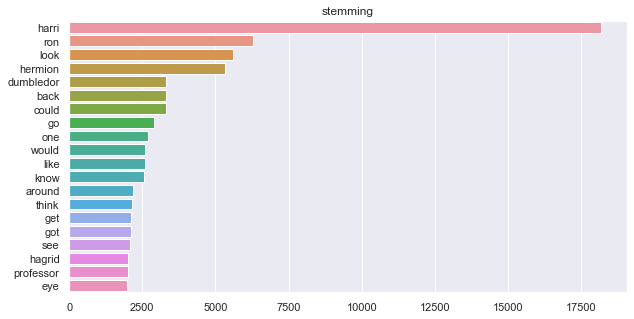

----------------------------------------------------------------------------------------------------
lemmatization
Number of words:  15915


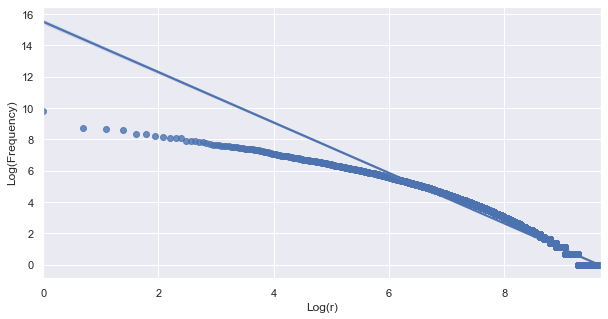

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.357
Model:                            OLS   Adj. R-squared (uncentered):              0.357
Method:                 Least Squares   F-statistic:                              8831.
Date:                Thu, 08 Oct 2020   Prob (F-statistic):                        0.00
Time:                        22:00:36   Log-Likelihood:                         -32004.
No. Observations:               15915   AIC:                                  6.401e+04
Df Residuals:                   15914   BIC:                                  6.402e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

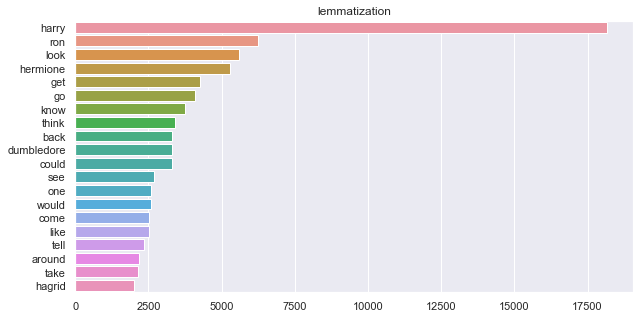

----------------------------------------------------------------------------------------------------


In [73]:
for i in ['token', 'no stop words', 'stemming', 'lemmatization']:
    
    print(i)
    
    tokens = list(
            itertools.chain.from_iterable(books_pd[i].to_list())
            )
    
    w = Counter(tokens).most_common()
    
    print('Number of words: ', len(w))
    
    zipf_law(w)
    
    w = w[:20] # First N words

    sns.barplot(
        y = [a[0] for a in w],
        x = [a[1] for a in w]
    )
    
    plt.title(i)

    plt.show()
    
    print('-' * 100)

### TF-IDF

In [74]:
dictionary = gensim.corpora.Dictionary(books_pd['lemmatization'])

corpus = [dictionary.doc2bow(s) for s in books_pd['lemmatization']]

tfidf = gensim.models.tfidfmodel.TfidfModel(corpus)

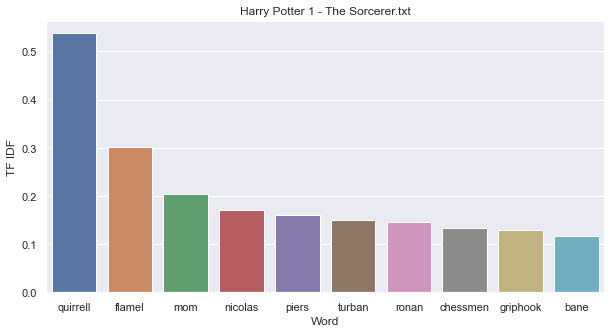

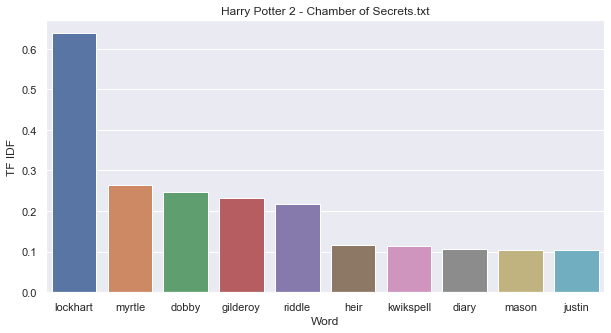

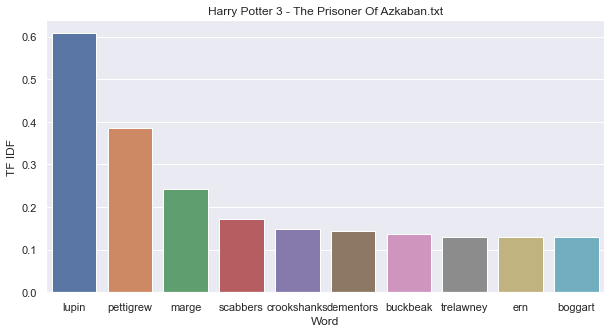

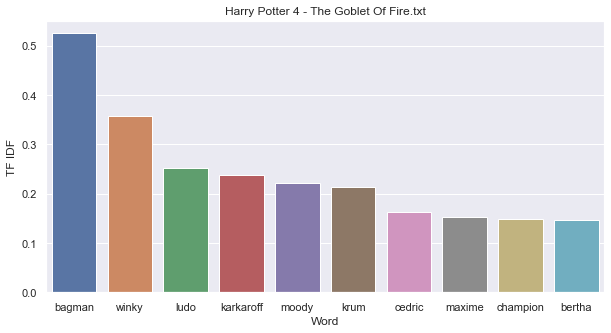

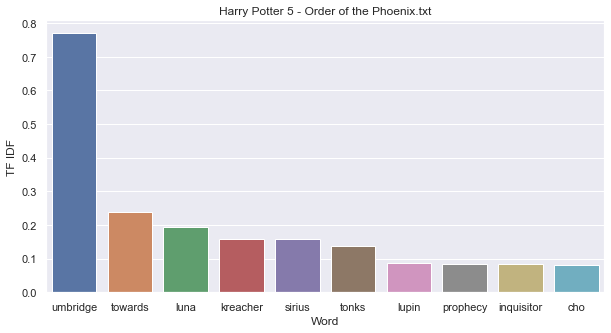

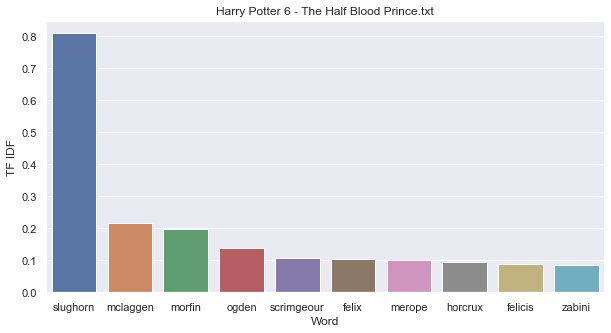

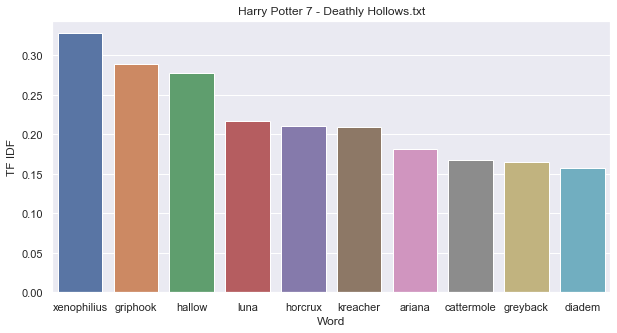

In [75]:
for n_chapter in range(len(corpus)):
    
    # Number of words to display
    n = 10

    df = pd.DataFrame(tfidf[corpus[n_chapter]])\
        .sort_values(1, ascending = False)\
        .set_axis(axis = 1, labels = ['Word', 'TF IDF'])

    df['Word'] = df['Word'].apply(lambda a: dictionary[a])
    
    sns.barplot(data = df[:n], x = 'Word', y = 'TF IDF')
    
    plt.title(files[n_chapter].split('\n')[0])

    plt.show()

### N-grams

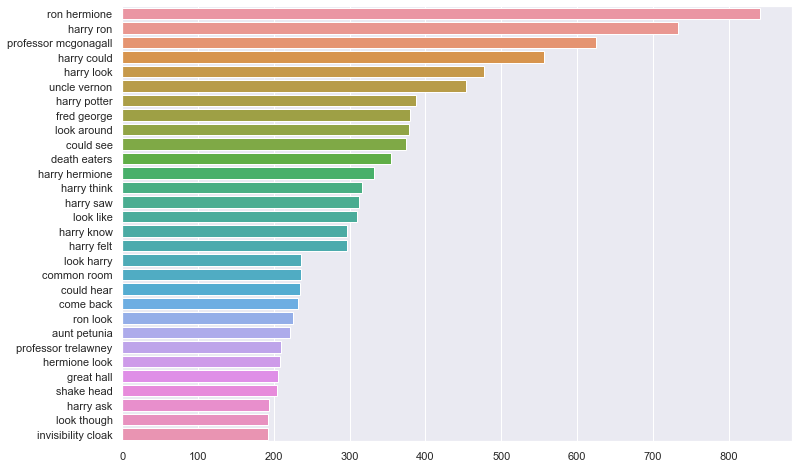

In [76]:
plt.figure(figsize=(12,8))

w = Counter(nltk.ngrams(itertools.chain.from_iterable(books_pd['lemmatization']), 2)).most_common()[:30]

sns.barplot(
    y = [' '.join(a[0]) for a in w],
    x = [a[1] for a in w],orient = 'h'
)

plt.show()

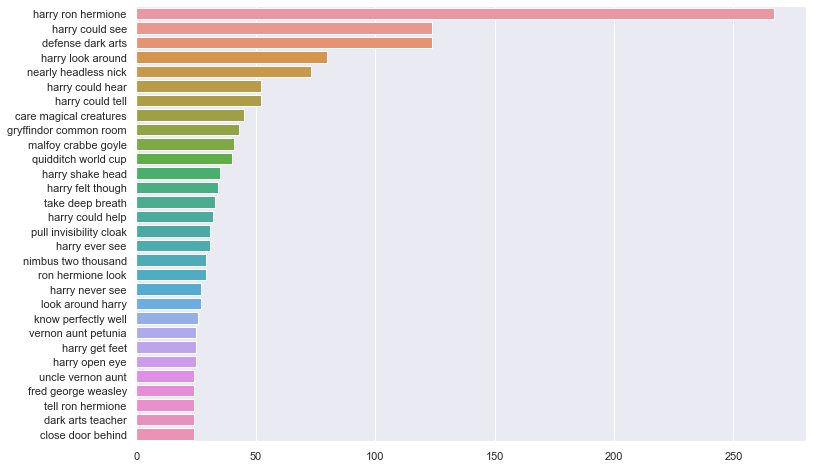

In [77]:
plt.figure(figsize=(12,8))

w = Counter(nltk.ngrams(itertools.chain.from_iterable(books_pd['lemmatization']), 3)).most_common()[:30]

sns.barplot(
    y = [' '.join(a[0]) for a in w],
    x = [a[1] for a in w],orient = 'h'
)

plt.show()

### Graph using n Grams

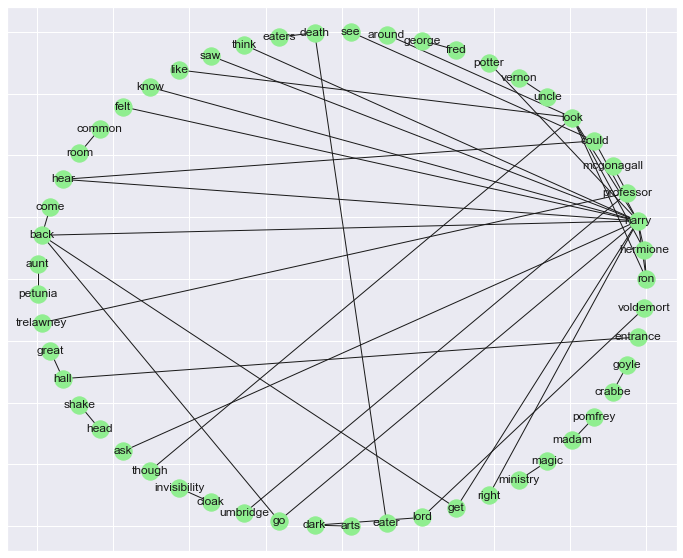

In [88]:
tokens = list(itertools.chain.from_iterable(books_pd['lemmatization']))

# Only N monst commen ngrams
n = 50

G = nx.Graph()

for i in Counter(nltk.ngrams(tokens, 2)).most_common()[:n]:
    
    G.add_edge(i[0][0], i[0][1], weight = i[1])


plt.figure(figsize=(12,10))

pos = (nx\
    #.planar_layout(G)\
    #.spring_layout(G, k=0.7, scale=0.05)
    .circular_layout(G)
    #.planar_layout(G)
    #.random_layout(G)
    #.spiral_layout(G)
      )

nx.draw_networkx(G, pos=pos, node_color='lightgreen')

plt.show()

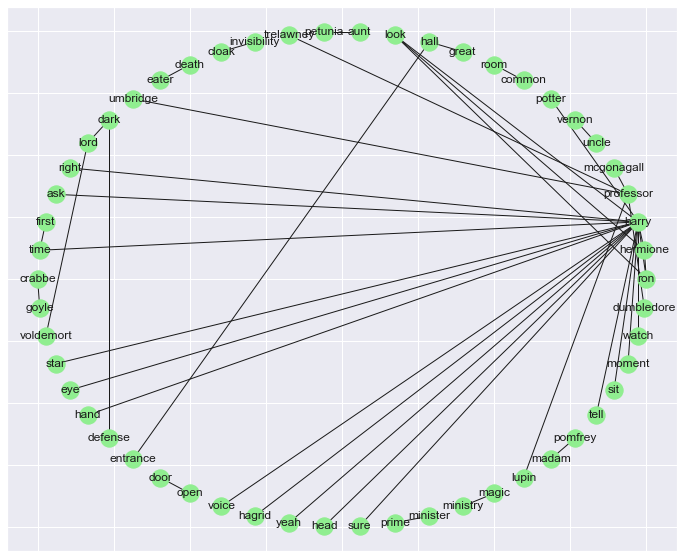

In [89]:
# Only N monst commen ngrams
n = 50

G = nx.Graph()

token_name = [i[0] for i in nltk.pos_tag(tokens) if i[1] == 'NNP' or i[1] == 'NN' or i[1] == 'JJ']

for i in Counter(nltk.ngrams(token_name, 2)).most_common()[:n]:
    
    G.add_edge(i[0][0], i[0][1], weight = i[1])


plt.figure(figsize=(12,10))

pos = (nx\
    #.planar_layout(G)\
    #.spring_layout(G, k=0.7, scale=0.05)
    .circular_layout(G)
    #.planar_layout(G)
    #.random_layout(G)
    #.spiral_layout(G)
      )

nx.draw_networkx(G, pos=pos, node_color='lightgreen')

plt.show()

### Sentiment Analysis

In [48]:
analyzer = SentimentIntensityAnalyzer()

d = {}
for n, s in enumerate(books_pd['lemmatization']):
    
    d[books_pd.index[n]] = analyzer.polarity_scores(' '.join(s))

df = pd.DataFrame(d).transpose()

df

,neg,neu,pos,compound
Harry Potter 1 - The Sorcerer,0.116,0.737,0.147,1.0
Harry Potter 2 - Chamber of Secrets,0.123,0.736,0.141,1.0
Harry Potter 3 - The Prisoner Of Azkaban,0.124,0.728,0.147,1.0
Harry Potter 4 - The Goblet Of Fire,0.129,0.721,0.150,1.0
Harry Potter 5 - Order of the Phoenix,0.126,0.718,0.156,1.0
Harry Potter 6 - The Half Blood Prince,0.131,0.703,0.165,1.0
Harry Potter 7 - Deathly Hollows,0.148,0.711,0.140,-1.0


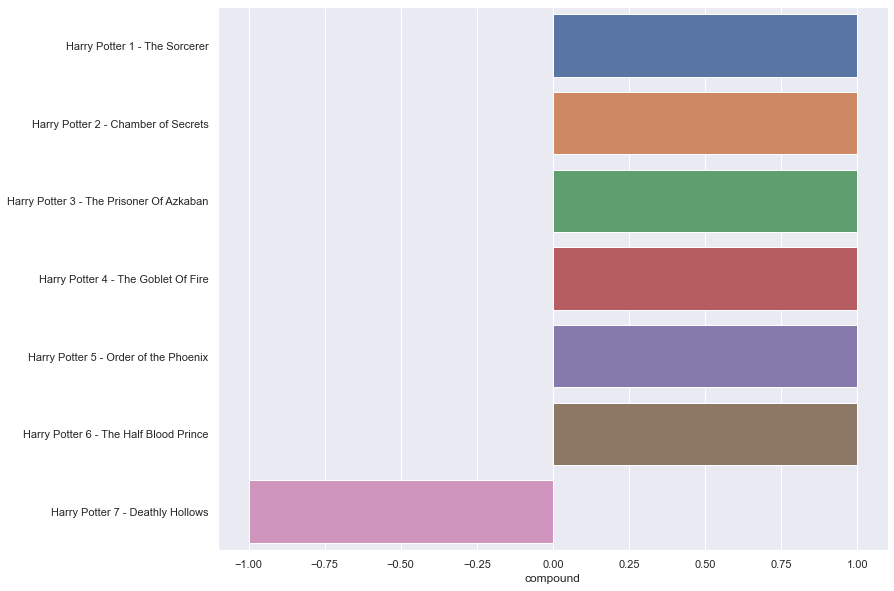

In [49]:
plt.figure(figsize=(12,10))

sns.barplot(
    y = df.index,
    x = df['compound'],
    orient='h'
)

plt.show()

In [50]:
# Create word2vec model
word2vec = gensim.models.Word2Vec(books_pd['lemmatization'], min_count=2)

# Create weights
x = word2vec[word2vec.wv.vocab]

# Create dataframe
df = pd.DataFrame(x, index = word2vec.wv.vocab)

df.head()

<ipython-input-50-cb41006db06b>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  x = word2vec[word2vec.wv.vocab]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
harry,0.061493,0.418250,-0.481341,-0.695647,1.308968,-0.654140,-0.104154,-0.085158,2.012306,-0.500524,...,0.235239,-0.487412,-0.110185,-0.140529,1.660910,-0.441847,0.061060,-0.245263,-0.131664,0.883984
potter,0.051703,0.345857,-0.405535,-0.583872,1.097517,-0.546322,-0.091554,-0.067741,1.690582,-0.413830,...,0.198255,-0.403437,-0.091805,-0.117302,1.378631,-0.366875,0.049527,-0.204102,-0.115373,0.737268
sorcerer,0.002130,0.023086,-0.025351,-0.035041,0.054889,-0.024729,-0.003338,-0.001003,0.093088,-0.023288,...,0.011113,-0.019954,-0.002067,-0.008335,0.075151,-0.017441,-0.000089,-0.013697,-0.009449,0.042550
stone,0.021451,0.132956,-0.154141,-0.219473,0.406839,-0.208609,-0.030813,-0.027850,0.631807,-0.156391,...,0.080019,-0.147592,-0.031123,-0.040564,0.516873,-0.133692,0.025507,-0.072433,-0.033581,0.270221
chapter,0.023044,0.144541,-0.173973,-0.249117,0.462461,-0.226783,-0.040395,-0.034296,0.717529,-0.175449,...,0.081151,-0.169208,-0.042559,-0.052576,0.583255,-0.157754,0.028515,-0.084327,-0.048507,0.309300


### Word Embedding

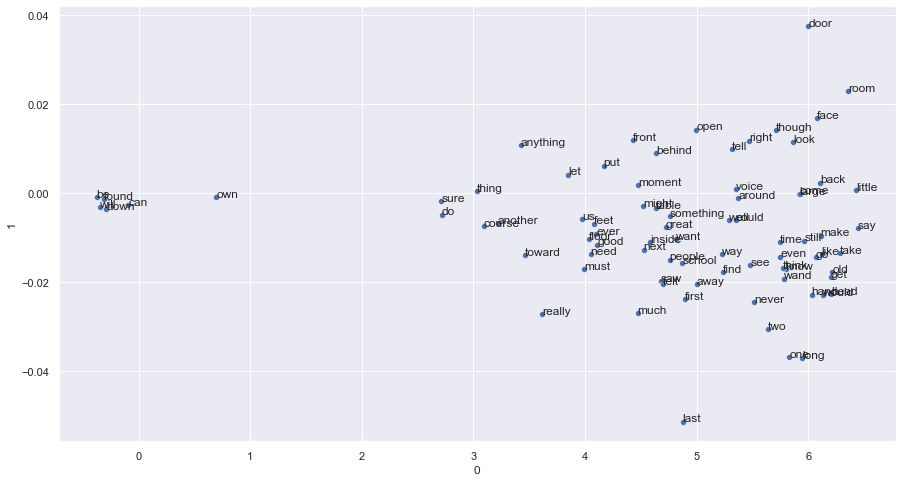

In [51]:
# Tokenize text
token = nltk.tokenize.word_tokenize('\n'.join(books_pd['raw text'].to_list()), language = language)

# Select most common words
slicer = [
        a[0] for a in Counter(token).most_common()
        # only words in the dataframe
        if a[0] in df.index
    ][:80] # First n words

# Create PCA model
pca = PCA(n_components=2)

# Fit model
transform = pca.fit_transform(df)

# Create dataframe with results
df_new = pd.DataFrame(transform, index=df.index).loc[slicer]

# Plot size
plt.figure(figsize=(15,8))

# Plot PCA result
sns.scatterplot(x = df_new[0], y = df_new[1]
)

# Plot Labels
for pos, name in zip(df_new.values, slicer):
    
    plt.annotate(name,xy=(pos[0],pos[1]))

plt.show()

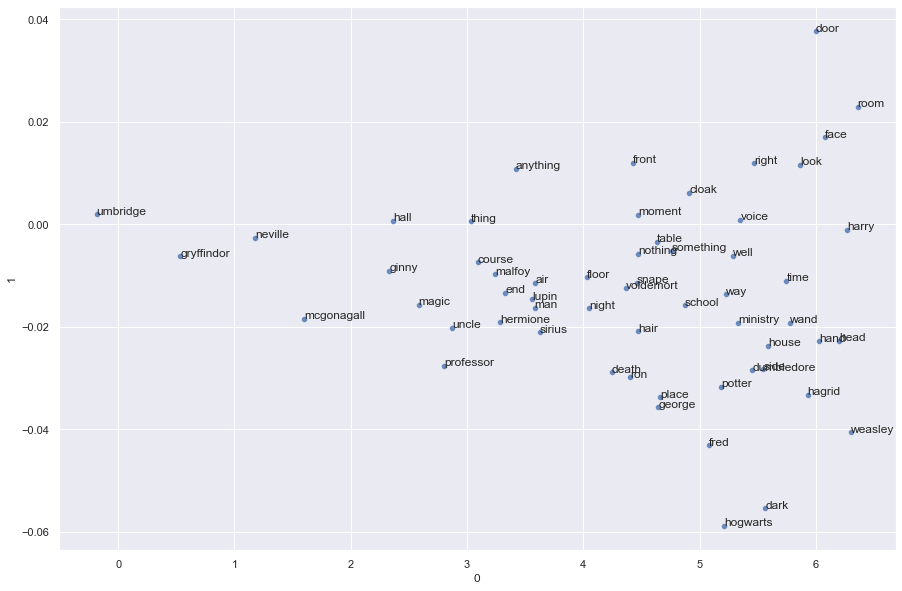

In [58]:
# Select all names
names = [i[0].lower() for i in nltk.pos_tag(token) if i[1] == 'NNP' or i[1] == 'NN']

# Select most common words
slicer = [
        a[0] for a in Counter(names).most_common()
        # only words in the dataframe
        if a[0] in df.index
    ][:60] # First n words

# Create PCA model
pca = PCA(n_components=2)

# Fit model
transform = pca.fit_transform(df)

# Create dataframe with results
df_new = pd.DataFrame(transform, index=df.index).loc[slicer]

df_new = df_new[df_new[1] < .7]

# Plot size
plt.figure(figsize=(15,10))

# Plot PCA result
sns.scatterplot(x = df_new[0], y = df_new[1], alpha = 0.8
)

# Plot Labels
for pos, name in zip(df_new.values, slicer):
    
    plt.annotate(name,xy=(pos[0],pos[1]))

plt.show()